# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(train['features'])

# TODO: Number of testing examples.
n_test = len(test['features'])

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes =  np.bincount(y_test).nonzero()[0].size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
# Visualizations will be shown in the notebook.
%matplotlib inline
dictionary={}
#Shows all the images that are present in the key
#for n in range(0,len(y_train)):
#    if not (y_train[n] in dictionary):
#        plt.figure()
#        plt.imshow(X_train[n])
#        dictionary[y_train[n]]="true"
#print(X_train[0].shape)
#X_train=[]
def pre_process_image(image):
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.reshape(image.shape +(1,))
    return image#.flatten()/255

train_features = np.array([pre_process_image(X_train[i]) for i in range(len(X_train))],dtype = np.float32)
test_features = np.array([pre_process_image(X_test[i]) for i in range(len(X_test))],
                          dtype = np.float32)
train_features_t, train_features_v, y_train_t, y_validate = train_test_split(train_features, y_train, random_state = 100, stratify = y_train)
for n in range(0,len(y_train)):
    if not (y_train[n] in dictionary):
        #plt.figure()
        #plt.imshow(X_train[n])
        dictionary[y_train[n]]=1
        #X_train[n]=cv2.cvtColor(X_train1[n], cv2.COLOR_BGR2GRAY)
    else:
        
        dictionary[y_train[n]]=dictionary[y_train[n]]+1
#for n in dictionary:
    #print("Class : " , n , " = = " , dictionary[n])
print(train_features_v[0].shape)
print(len(y_validate),len(train_features_t),len(train_features_v),len(y_train_t))

(32, 32, 1)
9803 29406 9803 29406


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
#Shuffling Data
from sklearn.utils import shuffle

train_features_t, y_train_t = shuffle(train_features_t, y_train_t)



In [6]:
#Importing tensor flow
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 128


In [7]:
#One Hot encoding
from sklearn.preprocessing import OneHotEncoder



def OHE_labels(Y_tr,N_classes):
    OHC = OneHotEncoder()
    
    Y_ohc = OHC.fit(np.arange(N_classes).reshape(-1, 1))
    Y_labels = Y_ohc.transform(Y_tr.reshape(-1, 1)).toarray()
    return Y_labels

def one_hot_encode(y, num_examples, num_classes):
    ret_y = np.zeros((num_examples, num_classes))
    for r in range(num_examples):
        ret_y[r][y[r]] = 1
    return ret_y


labels_train = OHE_labels(y_train_t,43)
#labels_train = one_hot_encode(y_validate,len(y_validate),43)

In [8]:
#Using the same code as LeNet
from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    f_weights_1 = tf.Variable(tf.truncated_normal((5,5,1,6),mean=mu,stddev=sigma))
    f_bias_1=tf.Variable(tf.zeros(6))
    strides_1=[1,1,1,1]
    padding='VALID'
    conv_1 = tf.nn.conv2d(x,f_weights_1,strides_1,padding)+f_bias_1
    # TODO: Activation.
    
    
    conv_1=tf.nn.relu(conv_1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    k_size_1=[1,6,6,1]
    max_strides_1=[1,1,1,1]
    conv_1_max=tf.nn.max_pool(conv_1,k_size_1,max_strides_1,padding)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    f_weights_2=tf.Variable(tf.truncated_normal((5,5,6,16),mean=mu,stddev=sigma))
    f_bias_2=tf.Variable(tf.zeros(16))
    # TODO: Activation.
    conv_2=tf.nn.conv2d(conv_1_max,f_weights_2,strides_1,padding)+f_bias_2
    conv_2=tf.nn.relu(conv_2)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    k_size_2=[1,15,15,1]
    conv_2_max=tf.nn.max_pool(conv_2,k_size_2,max_strides_1,padding)
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc1=flatten(conv_2_max)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc2_weights=tf.Variable(tf.truncated_normal([400,120],mean=mu,stddev=sigma))
    fc2_biases=tf.Variable(tf.zeros(120))
    fc2=tf.add(tf.matmul(fc1,fc2_weights),fc2_biases)
    
    # TODO: Activation.
    fc2=tf.nn.relu(fc2)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc3_weights=tf.Variable(tf.truncated_normal((120,84),mean=mu,stddev=sigma))
    fc3_biases=tf.Variable(tf.zeros(84))
    fc3=tf.add(tf.matmul(fc2,fc3_weights),fc3_biases)
    # TODO: Activation.
    fc3=tf.nn.relu(fc3)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc4_weights=tf.Variable(tf.truncated_normal((84,43),mean=mu, stddev=sigma))
    fc4_biases=tf.Variable(tf.zeros(43))
    fc4=tf.add(tf.matmul(fc3,fc4_weights),fc4_biases)
    #print(fc4)
    logits=fc4
    return logits

def LeNet1(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

In [9]:
#Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)



In [10]:
#Training Pipeline
rate = 0.001

logits = LeNet1(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [11]:
#Evaluating the model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [12]:
#Training the Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(train_features_t)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        #train_features, y_train = shuffle(train_features, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = train_features_t[offset:end], y_train_t[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(train_features_v, y_validate)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.720

EPOCH 2 ...
Validation Accuracy = 0.856

EPOCH 3 ...
Validation Accuracy = 0.900

EPOCH 4 ...
Validation Accuracy = 0.934

EPOCH 5 ...
Validation Accuracy = 0.943

EPOCH 6 ...
Validation Accuracy = 0.937

EPOCH 7 ...
Validation Accuracy = 0.942

EPOCH 8 ...
Validation Accuracy = 0.952

EPOCH 9 ...
Validation Accuracy = 0.960

EPOCH 10 ...
Validation Accuracy = 0.964

EPOCH 11 ...
Validation Accuracy = 0.967

EPOCH 12 ...
Validation Accuracy = 0.965

EPOCH 13 ...
Validation Accuracy = 0.964

EPOCH 14 ...
Validation Accuracy = 0.966

EPOCH 15 ...
Validation Accuracy = 0.964

Model saved


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I changed all the data into it's grayscale values. Having just one channel made it easier to train the model however after testing it for a couple of times, I felt that having all 3 channels gave me a slightly better result.

In [13]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.


#All the code is done above.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I used sklearn test_train_split method to divide the training data into training and validation data. 
Towards the end, the traning data had 29406 values and the validation set had 9803 values.

In [14]:
### Define your architecture here
### Feel free to use as many code cells as needed.

#Done above

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
My final architecture is similar to the LeNet architecture. 
Convolution layer 1. The output shape here is 28x28x6.

Activation 1. used a relu for activation.

Pooling layer 1. The output shape is 14x14x6.

Convolution layer 2. The output shape is 10x10x16.

Activation 2. Used a relu for activation.

Pooling layer 2. The output shape is 5x5x16.

Flatten layer. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.

Fully connected layer 1. This layer has 120 outputs.

Activation 3. Used a relu for activation

Fully connected layer 2. This layer 84 outputs.

Activation 4. Used a relu for activation.

Fully connected layer 3. This layer has 43 outputs.

In [15]:
### Train your model here.
### Feel free to use as many code cells as needed.

#Done above

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Used AdamOptimizer with a batch size of 120 and epochs of 15. 
sigma = 0
mu = 0.1
learning rate = 0.001 (All other learning rates were huge for this problem)

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
The problem is completely based out of the LeNet architecture with a bit of trial and error. I tried various preprocessing steps such as trying to use all three channels, grayscale, etc. Eventually I settled for both a model that can be trained easily and trains faster. The model took approximately 2-3 minutes to train using NVIDIA 940MX graphics processor. 
I tried out a bit of making it complex by adding another hidden layer before flattening out the structure in Layer 3. It didn't imporve the results by a huge amount. I felt the complexity introduced is not worth 0.001 in accuracy. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

# Load the images and plot them here.
### Feel free to use as many code cells as needed.



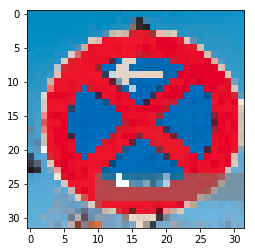

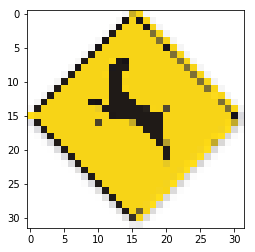

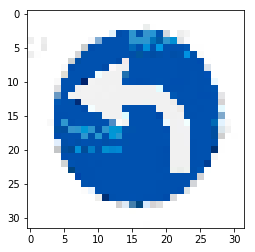

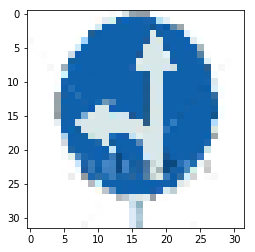

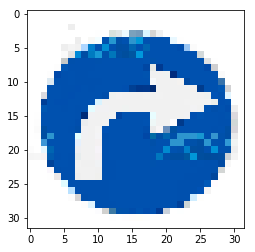

In [61]:
import glob
from PIL import Image
image_list=[]
for filename in glob.glob('./signs/*.*'): 
    #im=plt.imread(filename)
    img = Image.open(filename)
    img=img.resize((32,32))#, Image.ANTIALIAS) # resizes image in-place
    #imgplot = plt.imshow(img)
    plt.figure()
    plt.imshow(img)
    a=np.asarray(img)
    #a.reshape((32,32))
    a=pre_process_image(a)
    image_list.append(a)

image_list=np.array(image_list)
#print(image_list[0].shape)
#image_list[0]=plt.rezis

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
The images are a bit different than the images that are on the classification. Tried to combine a couple of right and left turns to see how the prediction predicts. Other than that they are regular images without much changes.

In [40]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
#Generating the predictions
#loader = tf.train.import_meta_graph('lenet.meta')
#loader.restore(sess, tf.train.latest_checkpoint('./'))
with tf.Session() as sess:
    prediction=tf.reduce_mean(tf.argmax(tf.nn.softmax(logits),1))
    #prediction=tf.argmax(tf.nn.softmax(logits),1)
    tf.global_variables_initializer().run()
    #print("Predictions",prediction.eval(feed_dict={x:image_list}))
    for img in image_list:
        print("Predictions",prediction.eval(feed_dict={x:[img]}))

Predictions 0
Predictions 23
Predictions 0
Predictions 0
Predictions 23


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

No. The model had a hard time finding out the proper images and more often than not it tended to predict the tougher one's wrong. It usually gets confused between the right and left turn only signs.

The accuracy is at 60%

In [60]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
x_pred = tf.placeholder("float", shape=(None, None, 1))
y_pred = tf.nn.softmax(logits)
topFive=tf.nn.top_k(y_pred, k=5, sorted=True, name=None)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    op = sess.run(topFive, feed_dict = {x: image_list})
    print(op)



TopKV2(values=array([[  8.70205760e-01,   1.29761651e-01,   3.12437442e-05,
          6.32096260e-07,   4.55255361e-07],
       [  1.00000000e+00,   5.04194482e-08,   1.60730587e-12,
          8.38757937e-13,   4.62468117e-13],
       [  9.99999046e-01,   6.17138198e-07,   3.21431173e-07,
          1.75995023e-08,   1.70781735e-08],
       [  9.58366871e-01,   4.09736373e-02,   5.69063879e-04,
          4.85120654e-05,   3.59301157e-05],
       [  9.96155679e-01,   3.83604527e-03,   7.23866515e-06,
          3.16608492e-07,   2.51046686e-07]], dtype=float32), indices=array([[36, 18, 12, 38, 10],
       [36, 18,  9, 21, 10],
       [36, 18,  0,  9, 27],
       [18, 36, 12,  0, 10],
       [36, 18, 10, 12, 33]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
TopKV2(values=array([[  8.70205760e-01,   1.29761651e-01,   3.12437442e-05,
          6.32096260e-07,   4.55255361e-07],
       [  1.00000000e+00,   5.04194482e-08,   1.60730587e-12,
          8.38757937e-13,   4.62468117e-13],
       [  9.99999046e-01,   6.17138198e-07,   3.21431173e-07,
          1.75995023e-08,   1.70781735e-08],
       [  9.58366871e-01,   4.09736373e-02,   5.69063879e-04,
          4.85120654e-05,   3.59301157e-05],
       [  9.96155679e-01,   3.83604527e-03,   7.23866515e-06,
          3.16608492e-07,   2.51046686e-07]], dtype=float32), indices=array([[36, 18, 12, 38, 10],
       [36, 18,  9, 21, 10],
       [36, 18,  0,  9, 27],
       [18, 36, 12,  0, 10],
       [36, 18, 10, 12, 33]], dtype=int32))

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.